[View in Colaboratory](https://colab.research.google.com/github/Sharathmk99/learning-deep-learning/blob/master/Logistic-Regression-Neural-Network.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [25]:
file_id = ['1RpdhyBJZSBfDI7ggO2r58-fePHEfgIZH', '1nv1ZxoCrZoIBQSojzPXQw8W4HXEUDaSh']
file_names = ['train_catvnoncat.h5', 'test_catvnoncat.h5']
import io
from googleapiclient.http import MediaIoBaseDownload

for index in range(len(file_id)):
  request = drive_service.files().get_media(fileId=file_id[index])
  downloaded = io.FileIO(file_names[index], 'wb')
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()
    print("Downloaded: ", int(_.progress() * 100), "%")
  downloaded.seek(0)

Downloaded:  100 %
Downloaded:  100 %


In [0]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Y:  b'cat'


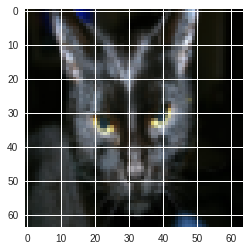

In [30]:
index = 25
plt.imshow(train_set_x_orig[index])
print("Y: ", classes[np.squeeze(train_set_y[:, index])])

In [32]:
train_set_x_orig.shape

(209, 64, 64, 3)